In [1]:
#필수과제 1에서 사용한 atemp를 변환해서 살펴보겠다. 기존 rmse값은 1268이었다.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('bike_sharing_daily.csv')

In [4]:
df_bs= df[['casual','atemp','hum','windspeed','registered','cnt']].dropna()
df_bs2 = df_bs[['casual','atemp','cnt']]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
from sklearn.preprocessing import power_transform

In [7]:
df_bs2[['yeo-johnson']]=power_transform(df_bs2[['atemp']], standardize=False)
df_bs2[['box-cox']]=power_transform(df_bs2[['atemp']], method='box-cox',standardize=False)

<ipython-input-7-3b2702a6f660>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs2[['yeo-johnson']]=power_transform(df_bs2[['atemp']], standardize=False)
<ipython-input-7-3b2702a6f660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs2[['box-cox']]=power_transform(df_bs2[['atemp']], method='box-cox',standardize=False)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-11-2a37d78af197>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bs2['atemp'], ax= axs[0])
<ipython-input-11-2a37d78af197>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bs2['yeo-johnson'], ax= axs[1])
<ipython-input-11-2a37d78af197>:4: UserWarning: 

`distplot` is a depr

<Axes: xlabel='box-cox', ylabel='Density'>

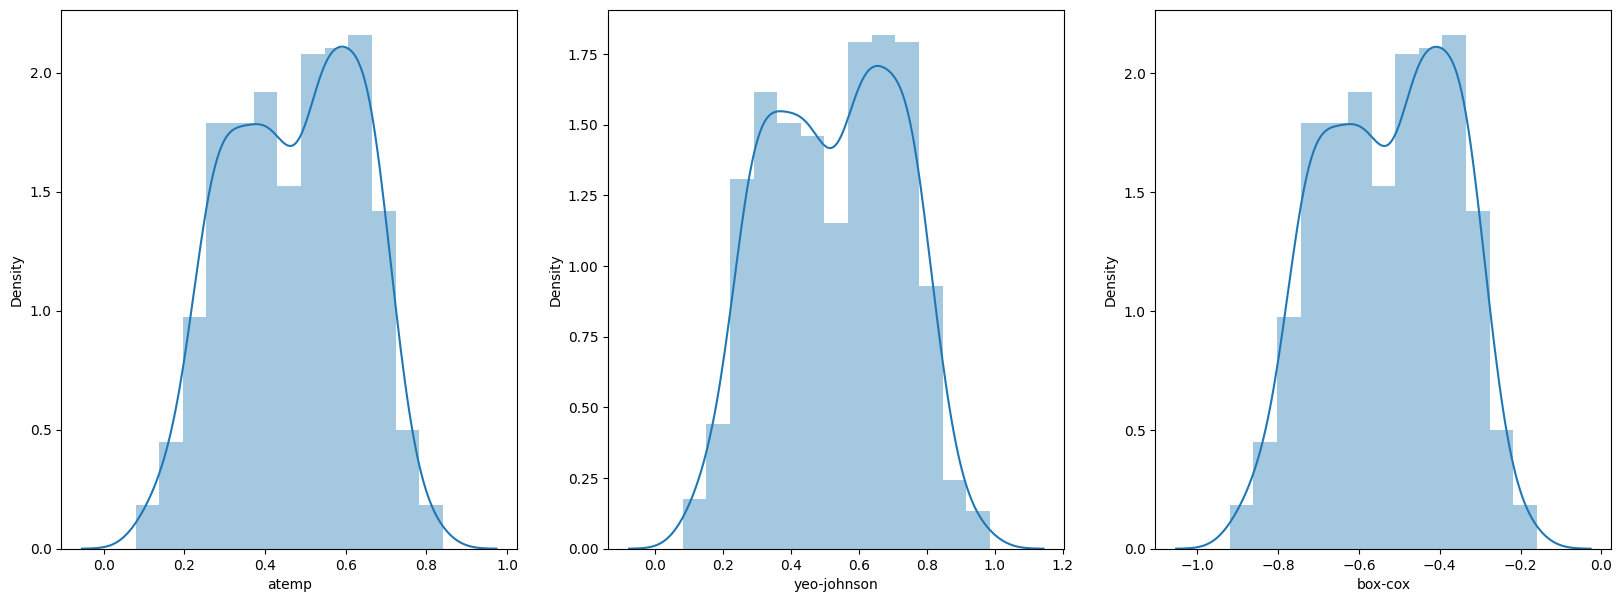

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(20,7))
sns.distplot(df_bs2['atemp'], ax= axs[0])
sns.distplot(df_bs2['yeo-johnson'], ax= axs[1])
sns.distplot(df_bs2['box-cox'], ax= axs[2])

In [12]:
df_X = np.array(df_bs2[['casual','yeo-johnson']]) #X 피처를 따로 빼고 numpy arrapy로 변환

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs2['cnt'], test_size=0.3, random_state=111)

In [13]:
model =LinearRegression() # 선형회귀 모델 불러오기

In [14]:
model.fit(X_train, y_train)#선형회귀 모델 학습
y_pred = model.predict(X_test)# X_test로 예측값 추출

In [15]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [16]:
rmse

1272.2245481184268

In [ ]:
#오히려 오차값이 증가한 모습이다.